In [1]:
#Import Dependencies
!pip install missingno
!pip install psycopg2-binary
import missingno as msno
import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
from sqlalchemy import create_engine

In [2]:
import warnings
warnings.filterwarnings("ignore")

**GoodRead Books ETL**

In [11]:
#Create the reference to the Books CSV
books_df = "Resources/books.csv"

In [12]:
#Read and display the CSV with Pandas DataFrame
books_df_pd = pd.read_csv(books_df, error_bad_lines = False)
books_df_pd.head()

,id,isbn,isbn13,authors,original_publication_year,original_title,title,language_code
0,1,439023483,9.780440e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng
1,2,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng
2,3,316015849,9.780320e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US
3,4,61120081,9.780060e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng
4,5,743273567,9.780740e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng


In [13]:
#Print the number of rows and columns
print("Dataset contains {} rows and {} columns".format(books_df_pd.shape[0], books_df_pd.shape[1]))

Dataset contains 10000 rows and 8 columns


In [14]:
#Display the Data
books_df_pd.head()

,id,isbn,isbn13,authors,original_publication_year,original_title,title,language_code
0,1,439023483,9.780440e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng
1,2,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng
2,3,316015849,9.780320e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US
3,4,61120081,9.780060e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng
4,5,743273567,9.780740e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng


In [15]:
#Get a reference to the columns
books_df_pd.dtypes

id                             int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
dtype: object

In [16]:
#Rename the Columns
new_books_df = (books_df_pd.rename(columns={'book_id': "Book_ID", 
                                            "isbn": "ISBN", 
                                            "isbn13": "ISBN_13", 
                                            "authors": "Authors", 
                                            "original_publication_year": "Publication_Year", 
                                            "title":"Title", 
                                            "language_code": "Language_Code", 
                                            "ratings_count":"Ratings_Count", 
                                            "work_text_reviews_count":"Text_Reviews_Count"}))

In [19]:
#Print the Columns renamed
new_books_df.head()

,id,ISBN,ISBN_13,Authors,Publication_Year,original_title,Title,Language_Code
0,1,439023483,9.780440e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng
1,2,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng
2,3,316015849,9.780320e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US
3,4,61120081,9.780060e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng
4,5,743273567,9.780740e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng


<Figure size 1296x720 with 0 Axes>

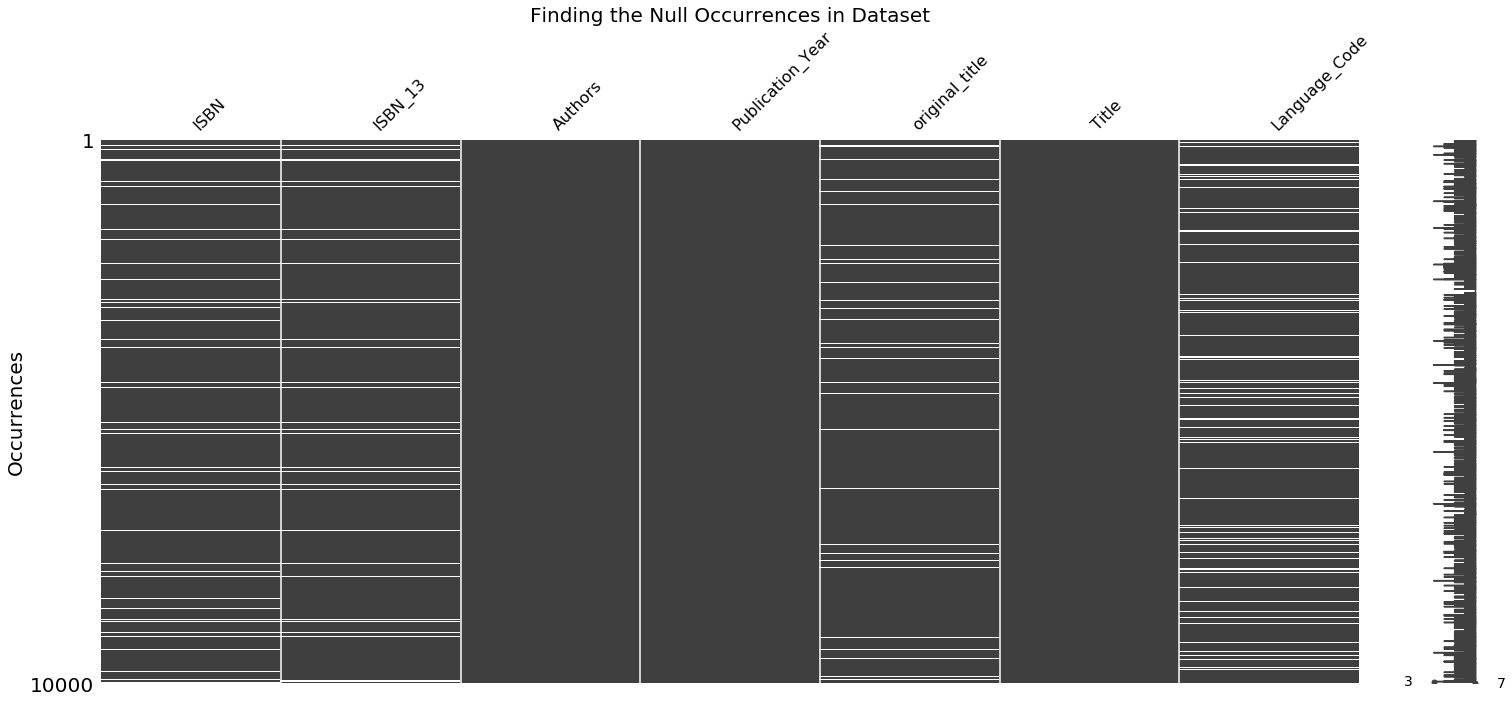

<Figure size 1296x720 with 0 Axes>

In [24]:
#Visualizing the null values present in each column

null_df = new_books_df.drop('id', axis='columns')
msno.matrix(null_df)
plt.ylabel("Occurrences", fontsize=20)
plt.title("Finding the Null Occurrences in Dataset", fontsize=20)
plt.figure(figsize = (18, 10))

In [26]:
#Sort 'Title' and 'Author' columns to be the first two  
new_books_df = new_books_df[['Title', 'Authors', 'ISBN', 'ISBN_13', 'Publication_Year', 'Language_Code']]
new_books_df.head()

,Title,Authors,ISBN,ISBN_13,Publication_Year,Language_Code
3997,"Angels (Walsh Family, #3)",Marian Keyes,60512148,9.780060e+12,2002.0,en-US
9609,"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",حسن الجندي,NaN,9.789770e+12,2013.0,ara
2854,#GIRLBOSS,Sophia Amoruso,039916927X,9.780400e+12,2014.0,eng
1291,'Salem's Lot,"Stephen King, Jerry N. Uelsmann",385516487,9.780390e+12,2005.0,eng
348,'Salem's Lot,Stephen King,450031063,9.780450e+12,1975.0,en-GB


In [27]:
#Sort Title Column in Ascending order
new_books_df.sort_values('Title', inplace=True)
new_books_df.head()

,Title,Authors,ISBN,ISBN_13,Publication_Year,Language_Code
3997,"Angels (Walsh Family, #3)",Marian Keyes,60512148,9.780060e+12,2002.0,en-US
9609,"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",حسن الجندي,NaN,9.789770e+12,2013.0,ara
2854,#GIRLBOSS,Sophia Amoruso,039916927X,9.780400e+12,2014.0,eng
1291,'Salem's Lot,"Stephen King, Jerry N. Uelsmann",385516487,9.780390e+12,2005.0,eng
348,'Salem's Lot,Stephen King,450031063,9.780450e+12,1975.0,en-GB


In [28]:
#Fill in Null Values
new_books_df.fillna("Unknown")
new_books_df.head()

,Title,Authors,ISBN,ISBN_13,Publication_Year,Language_Code
3997,"Angels (Walsh Family, #3)",Marian Keyes,60512148,9.780060e+12,2002.0,en-US
9609,"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",حسن الجندي,NaN,9.789770e+12,2013.0,ara
2854,#GIRLBOSS,Sophia Amoruso,039916927X,9.780400e+12,2014.0,eng
1291,'Salem's Lot,"Stephen King, Jerry N. Uelsmann",385516487,9.780390e+12,2005.0,eng
348,'Salem's Lot,Stephen King,450031063,9.780450e+12,1975.0,en-GB


**TMDB Movies ETL**

In [29]:
#Create the reference to the CSV for Movies
movies_df = "Resources/tmdb_5000_movies.csv"

In [30]:
#Read and display the CSV with Pandas DataFrame
movies_df_pd = pd.read_csv(movies_df, error_bad_lines = False)
movies_df_pd.head()

,serial_id,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,1,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/09,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,2,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/07,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,3,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/15,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,4,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/12,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,5,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/12,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [31]:
#Print the number of rows and columns
print("Dataset contains {} rows and {} columns".format(movies_df_pd.shape[0], movies_df_pd.shape[1]))

Dataset contains 4803 rows and 21 columns


In [32]:
#Get a reference to the columns
movies_df_pd.dtypes

serial_id                 int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [33]:
#Rename the Column
new_movies_df = (movies_df_pd.rename(columns={'title': "Title",
                                             'original_language': "Original Language",
                                             'release_date': "Release Date"}))

In [34]:
#Print the Column renamed
new_movies_df.head()

,serial_id,budget,genres,homepage,id,keywords,Original Language,original_title,overview,popularity,...,production_countries,Release Date,revenue,runtime,spoken_languages,status,tagline,Title,vote_average,vote_count
0,1,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/09,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,2,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/07,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,3,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/15,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,4,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/12,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,5,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/12,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [35]:
#Drop the columns not needed and print
new_movies_df_1 = new_movies_df.drop(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count'], axis = 1) 
new_movies_df_1.head()

,serial_id,Original Language,Release Date,Title
0,1,en,12/10/09,Avatar
1,2,en,5/19/07,Pirates of the Caribbean: At World's End
2,3,en,10/26/15,Spectre
3,4,en,7/16/12,The Dark Knight Rises
4,5,en,3/7/12,John Carter


Text(0.5, 1.0, 'Language vs. Count')

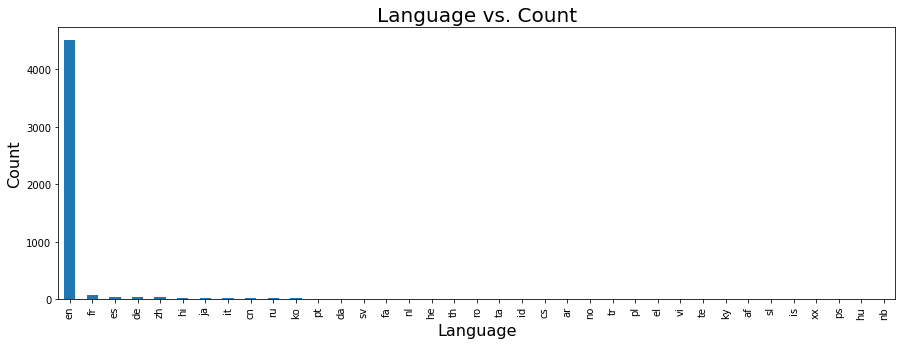

In [36]:
plt.figure(figsize=(15,5))
ax = new_movies_df_1['Original Language'].value_counts().plot(kind='bar')

ax.set_xlabel('Language', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

ax.set_title('Language vs. Count', fontsize=20)

In [37]:
#Sort 'Title' column to be the first column
new_movies_df = new_movies_df[['Title', 'Original Language', 'Release Date']]
new_movies_df.head()

,Title,Original Language,Release Date
0,Avatar,en,12/10/09
1,Pirates of the Caribbean: At World's End,en,5/19/07
2,Spectre,en,10/26/15
3,The Dark Knight Rises,en,7/16/12
4,John Carter,en,3/7/12


In [38]:
#Sort Title Column in Ascending order
new_movies_df.sort_values('Title',inplace=True)
new_movies_df.head()

,Title,Original Language,Release Date
4257,#Horror,de,11/20/15
3339,(500) Days of Summer,en,7/17/09
3556,10 Cloverfield Lane,en,3/10/16
2903,10 Days in a Madhouse,en,11/20/15
2739,10 Things I Hate About You,en,3/30/99


In [39]:
#Find how many Null Values there are
null_columns = new_movies_df.columns[new_movies_df.isnull().any()]
new_movies_df[null_columns].isnull().sum()

Release Date    1
dtype: int64

In [40]:
#Locate the null value to the movie title
new_movies_df.loc[4553]

Title                America Is Still the Place
Original Language                            en
Release Date                                NaN
Name: 4553, dtype: object

In [41]:
#Fill in Null Value
new_movies_df2 = new_movies_df.fillna("2015-03-01")


In [42]:
#Print the null value being replaced
print(new_movies_df2[new_movies_df["Release Date"].isnull()][null_columns])

     Release Date
4553   2015-03-01


In [43]:
#Print new table
new_movies_df2.head()

,Title,Original Language,Release Date
4257,#Horror,de,11/20/15
3339,(500) Days of Summer,en,7/17/09
3556,10 Cloverfield Lane,en,3/10/16
2903,10 Days in a Madhouse,en,11/20/15
2739,10 Things I Hate About You,en,3/30/99


In [44]:
rds_connection_string = "posgres:Madison1286@localhost:49265/books-movies_db”"
engine = create_engine(f"postgresql://{rds_connection_string}")

In [ ]:
engine.table_names()

In [ ]:
new_movies_df2.to_sql(name='Title', con=engine, if_exists='append', index=False)

In [ ]:
new_books_df.to_sql(name='Title', con=engine, if_exists='append', index=False)

In [ ]:
pd.read_sql_query('select * from Title', con=engine).head()

In [ ]:
pd.read_sql_query('select * from Title', con=engine).head()